# Weighted Graph

In [17]:
# each tuple (u, v, w) represents an edge from u to v with weight w.
edges = [(0, 1, 10), (0, 2, 80), (1, 2, 6), (1, 4, 20),
         (2, 3, 70), (4, 5, 50), (4, 6, 5), (5, 6, 10)]

In [18]:
def get_vertices(edges):
  # extracts unique vertices from a list of edges.
  vertices = set()
  for u, v, w in edges:
    vertices.add(u)
    vertices.add(v)
  return vertices


vertices = get_vertices(edges)
print(vertices)

{0, 1, 2, 3, 4, 5, 6}


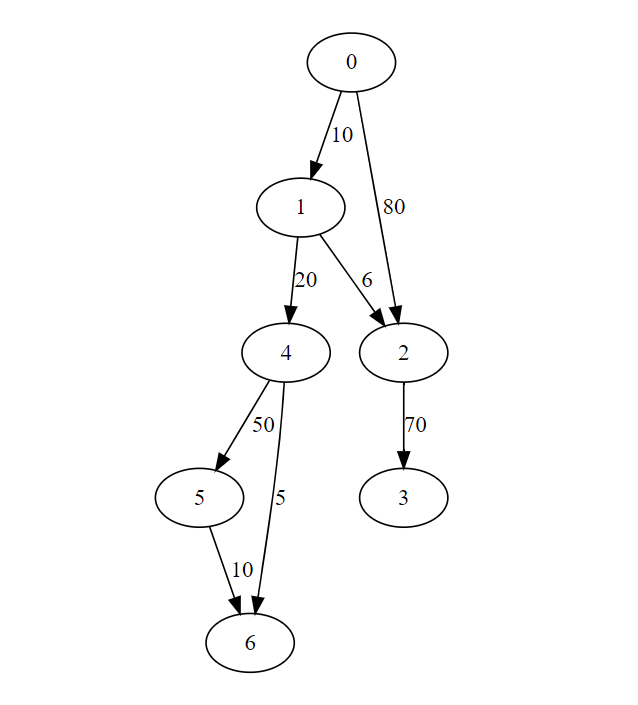

## Adjacency matrix

In [19]:
def create_adjacency_matrix(vertices, edges):
  size = len(vertices)
  adjacency_matrix = [[(0, 0) for j in range(size)] for i in range(size)]  # initialize (skeleton)

  for u, v, w in edges:
    adjacency_matrix[u][v] = (1, w)  # links

  return adjacency_matrix


# output: (1/0, weight) at [u][v] where 1 means link exists, 0 means no link
create_adjacency_matrix(vertices, edges)

[[(0, 0), (1, 10), (1, 80), (0, 0), (0, 0), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (1, 6), (0, 0), (1, 20), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (0, 0), (1, 70), (0, 0), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 50), (1, 5)],
 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 10)],
 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]]

## Adjacency list

In [20]:
def create_adjacency_list(vertices, edges):
  adjacency_list = {u: [] for u in vertices}  # initialize

  for u, v, w in edges:
    adjacency_list[u].append((v, w))  # links

  return adjacency_list


# Output: list of (v, weight) at u where u has links to v with weight
create_adjacency_list(vertices, edges)

{0: [(1, 10), (2, 80)],
 1: [(2, 6), (4, 20)],
 2: [(3, 70)],
 3: [],
 4: [(5, 50), (6, 5)],
 5: [(6, 10)],
 6: []}

In [21]:
def print_adjacency_list(adjacency_list):
  nodes = sorted(adjacency_list.keys())
  edges = []

  for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
      edges.append((node, neighbor))

  # print nodes
  for node in nodes:
    print(node)

  # print edges
  for edge in edges:
    print(f"{edge[0]} {edge[1][0]} {edge[1][1]}")


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

print_adjacency_list(adjacency_list)

0
1
2
3
0 1 10
0 2 6
1 0 10
1 3 15
1 2 4
2 0 6
2 1 4
2 3 11
3 1 15
3 2 11


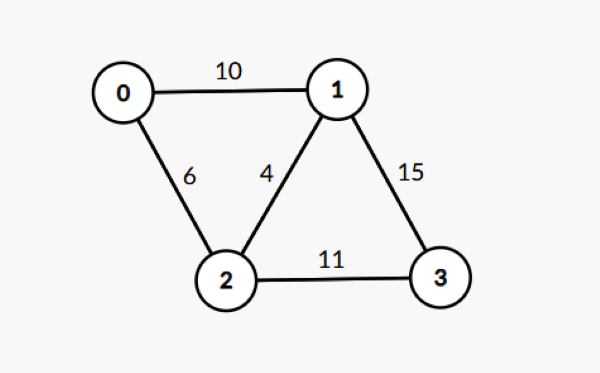

# Dijkstra's Algorithm

**Find the shortest path from a single source vertex to all other vertices.**

### Difference between algorithm 1 and 2

Both algorithms update distances to neighbors but differ in how they select the current vertex:

- Algorithm 1 iteratively searches for the minimum distance vertex among unvisited vertices.
- Algorithm 2 utilizes a priority queue to dequeue the vertex with the minimum distance efficiently.

### Algorithm 1

Use a loop to repeatedly select the unvisited vertex with the smallest known distance, mark it as visited, and update distances to its neighbors until all vertices are processed.

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Initialize `visited` to track visited vertices (`False` initially).
   - Initialize `distances` with shortest distances from `start_vertex` (`inf` initially, `0` for `start_vertex`).

2. **Iterate until all vertices are processed**:
   - Find the unvisited vertex `current_vertex` with the smallest known distance.
   - Break if no `current_vertex` is found (all visited).
   - Mark `current_vertex` as visited.
   - Update distances to its neighbors:
     - Calculate new distances through `current_vertex`.
     - Update if a shorter path is found (`distances[neighbor]`).

3. **Result**:
   - `distances` has shortest paths from `start_vertex` to all vertices.

In [22]:
def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distances = {vertex: float('inf') for vertex in adjacency_list}
  distances[start_vertex] = 0

  # loop until all vertices have been processed
  while True:
    # find the vertex with the smallest distance among unvisited vertices
    current_vertex = None
    for vertex in adjacency_list:
      if not visited[vertex]:
        if current_vertex is None or distances[vertex] < distances[current_vertex]:
          current_vertex = vertex

    if current_vertex is None:
      break  # no more vertices to process

    visited[current_vertex] = True

    # update distances to neighbors
    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distances[current_vertex] + weight
        if new_distance < distances[neighbor]:
          distances[neighbor] = new_distance

    # print(f'{current_vertex=}, {distances=}')

  return distances


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

dijkstra(adjacency_list, 0) == {0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}

True

In [23]:
adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A')

{'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6}

Dijkstra's algorithm in 3 minutes (https://youtu.be/_lHSawdgXpI)

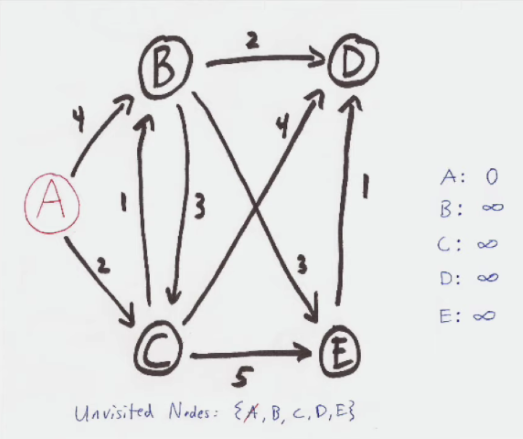

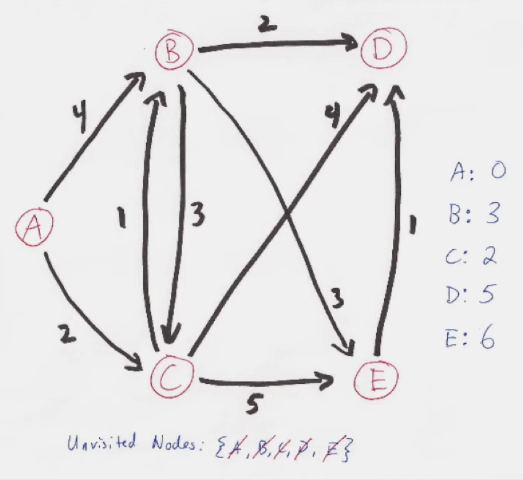

### Algorithm 2

Use a priority queue to repeatedly dequeue the vertex with the smallest known distance, update distances to its neighbors, and enqueue them with updated distances until the queue is empty.

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Create a `PriorityQueue` `pq`.
   - Initialize `distances` with shortest distances from `start_vertex` (`inf` initially, `0` for `start_vertex`).
   - Enqueue `start_vertex` with priority `0`.

2. **Iterate until the priority queue is empty**:
   - Dequeue `current_vertex` from `pq`.
   - For each neighbor of `current_vertex`:
     - Calculate new distance `new_distance`.
     - Update `distances[neighbor]` if `new_distance` is shorter.
     - Enqueue `neighbor` with `new_distance`.

3. **Result**:
   - `distances` has shortest paths from `start_vertex` to all vertices.

🌿🌿 **How a Priority Queue Works**

A priority queue enqueues tuples `(priority, value)`, sorting by priority. Imagine a queue where the richest people leave first, based on net worth, not arrival order. Similarly, our priority queue prioritizes vertices with the lowest distances. Dequeue returns the highest priority (lowest distance) item each time.

In [24]:
import heapq

heap = []

# priority queue based on student marks and names (lower marks prioritized)
heapq.heappush(heap, (80, 'rahul'))
heapq.heappush(heap, (100, 'vidhatri'))
heapq.heappush(heap, (50, 'cmd'))

display(heap)

print(heapq.heappop(heap))
print(heapq.heappop(heap))
print(heapq.heappop(heap))

[(50, 'cmd'), (100, 'vidhatri'), (80, 'rahul')]

(50, 'cmd')
(80, 'rahul')
(100, 'vidhatri')


In [25]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, item, priority):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)[1]


def dijkstra(adjacency_list, start_vertex):
  distances = {vertex: float('inf') for vertex in adjacency_list}
  distances[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(start_vertex, 0)

  # process the queue until it's empty
  while not pq.is_empty():
    current_vertex = pq.dequeue()

    # update distances to neighbors
    for neighbor, weight in adjacency_list[current_vertex]:
      new_distance = distances[current_vertex] + weight
      if new_distance < distances[neighbor]:
        distances[neighbor] = new_distance
        pq.enqueue(neighbor, new_distance)

  return distances


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

dijkstra(adjacency_list, 0) == {0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}

True

### Bellman-Ford Algorithm

Relax all edges repeatedly to find the shortest paths from the start vertex, and check for negative-weight cycles (optional).

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Initialize `distances` with shortest distances from `start_vertex` (`inf` initially, `0` for `start_vertex`).

2. **Relax all edges |V|-1 times**:
   - For each vertex and its neighbors:
     - Update `distances[neighbor]` if a shorter path is found through the current vertex.

3. **Negative-Weight Cycle Check (optional)**:
   - Check all edges one more time:
     - Raise an error if a shorter path is still found, indicating a negative-weight cycle.

4. **Result**:
   - `distances` has shortest paths from `start_vertex` to all vertices or raises an error if a negative-weight cycle is detected.

🌿🌿 **Relaxation**

Relaxation refers to the process of updating the shortest known distance to a vertex if a shorter path is found through another vertex.

Bellman-Ford in 4 minutes — Theory (https://youtu.be/9PHkk0UavIM)

Bellman-Ford in 5 minutes — Step by step example (https://youtu.be/obWXjtg0L64)

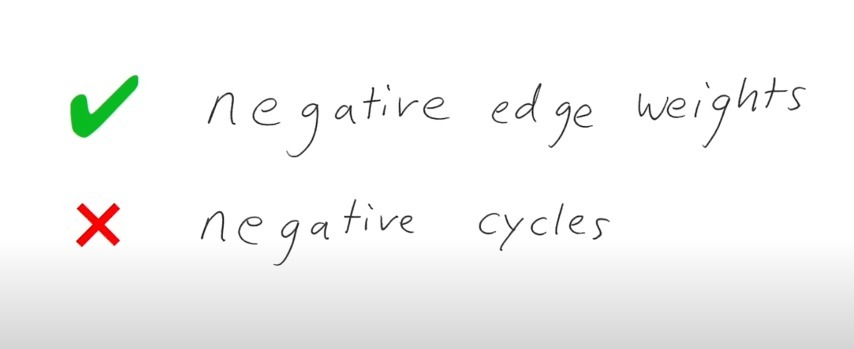

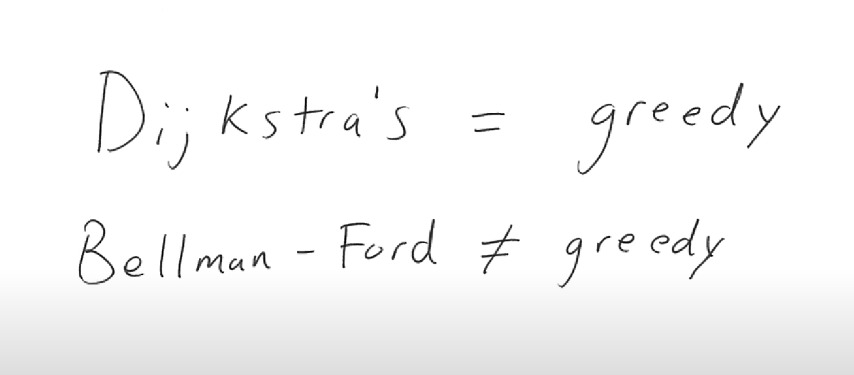

In [26]:
def bellman_ford(adjacency_list, start_vertex):
  # initialize distances
  distances = {vertex: float('inf') for vertex in adjacency_list}
  distances[start_vertex] = 0

  # relax all edges |v|-1 times
  for _ in range(len(adjacency_list) - 1):
    for parent in adjacency_list:
      for child, weight in adjacency_list[parent]:
        if distances[parent] != float('inf'):
          new_distance = distances[parent] + weight
          if new_distance < distances[child]:
            distances[child] = distances[parent] + weight

  # optional: check for negative-weight cycles
  for parent in adjacency_list:
    for child, weight in adjacency_list[parent]:
      if distances[parent] != float('inf'):
        new_distance = distances[parent] + weight
        if new_distance < distances[child]:
          raise ValueError("Graph contains a negative-weight cycle")

  return distances


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

bellman_ford(adjacency_list, 0) == {0: 0, 1: 10, 2: 16, 3: 86, 4: 30, 5: 80, 6: 35}

True

In [27]:
adjacency_list = {
    'S': [('E', 8), ('A', 10)],
    'E': [('D', 1)],
    'A': [('C', 2)],
    'D': [('A', -4), ('C', -1)],
    'B': [('A', 1)],
    'C': [('B', -2)],
}

bellman_ford(adjacency_list, 'S')

{'S': 0, 'E': 8, 'A': 5, 'D': 9, 'B': 5, 'C': 7}

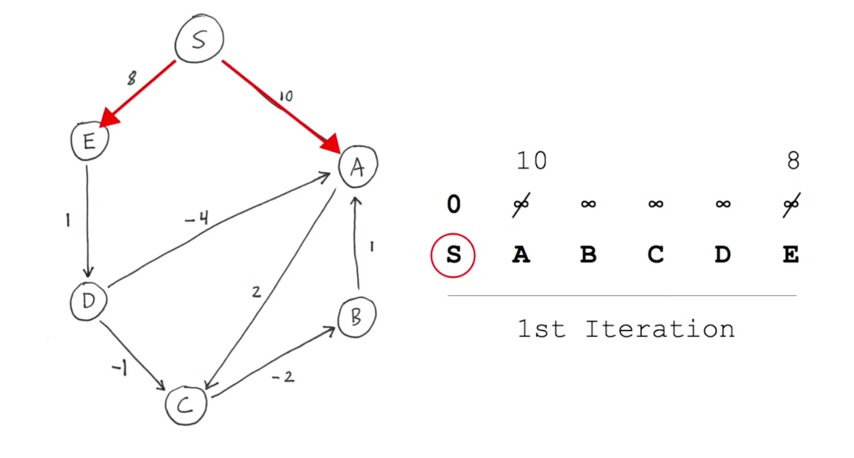

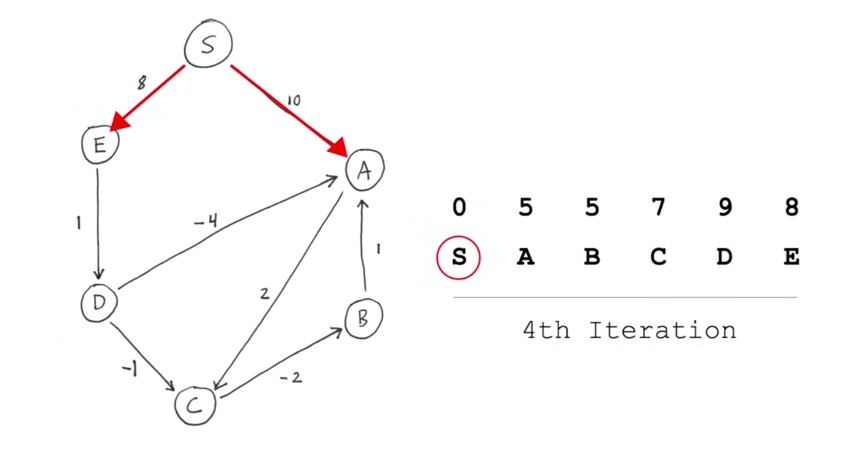

### Floyd-Warshall Algorithm

Find shortest paths between all pairs of vertices in a weighted graph using dynamic programming.

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Create a distance matrix `dist` initialized with `inf` for all pairs of vertices, except `0` on diagonal for self-loops.

2. **Triple nested loop to update distances**:
     - For each vertex `k`:
       - For each pair of vertices `u` and `v`:
         - Update `dist[u][v]` if a shorter path is found through `k`.

3. **Result**:
   - `dist` contains shortest paths between all pairs of vertices in the graph represented by the adjacency list.

Floyd–Warshall algorithm in 4 minutes (https://youtu.be/4OQeCuLYj-4)

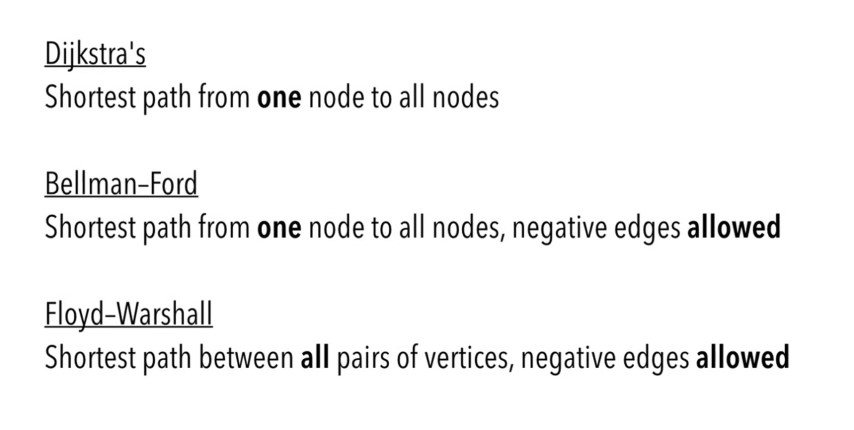

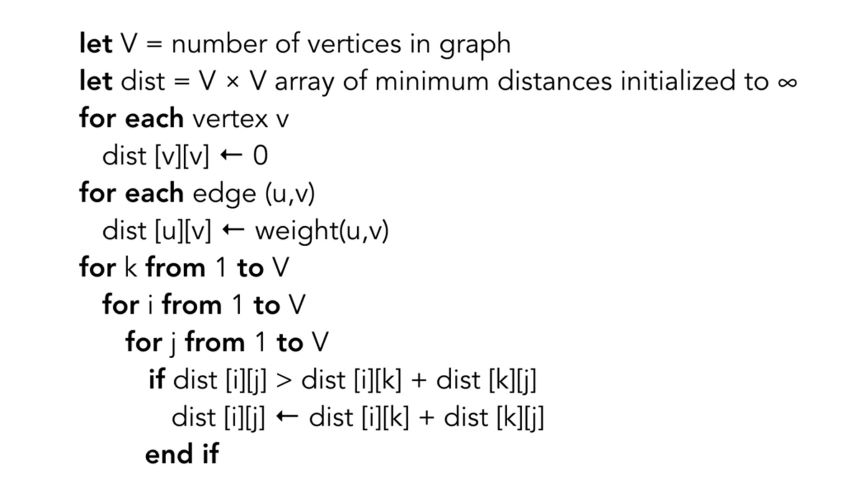

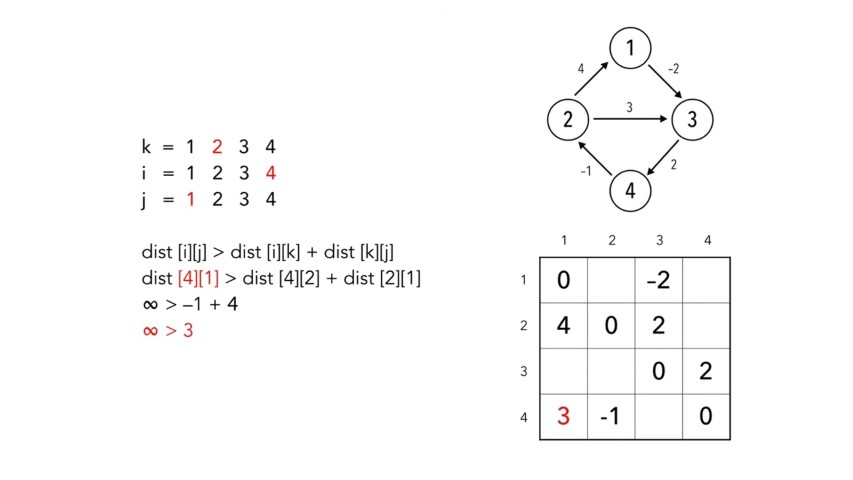

In [28]:
def floyd_warshall(adjacency_list):
  vertices = list(adjacency_list.keys())
  n = len(vertices)

  # initialize distances matrix with infinities
  dist = {u: {v: float('inf') for v in vertices} for u in vertices}

  # initialize distances based on adjacency list
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      dist[u][v] = weight

  # set distance to self as 0
  for v in vertices:
    dist[v][v] = 0

  # triple nested loop to update distances
  for k in vertices:
    for u in vertices:
      for v in vertices:
        if dist[u][k] != float('inf') and dist[k][v] != float('inf'):
          dist[u][v] = min(dist[u][v], dist[u][k] + dist[k][v])

  return dist


adjacency_list = {0: [(1, 10), (7, 8)],
                  1: [(5, 2)],
                  2: [(1, 1), (3, 1)],
                  3: [(4, 3)],
                  4: [(5, -1)],
                  5: [(2, -2)],
                  6: [(1, -4), (5, -1)],
                  7: [(6, 1)]}

dist = floyd_warshall(adjacency_list)
display(dist)

# validating the output (printing distances like a matrix)
[list(dist[u].values()) for u in adjacency_list]

{0: {0: 0, 1: 5, 2: 5, 3: 6, 4: 9, 5: 7, 6: 9, 7: 8},
 1: {0: inf, 1: 0, 2: 0, 3: 1, 4: 4, 5: 2, 6: inf, 7: inf},
 2: {0: inf, 1: 1, 2: 0, 3: 1, 4: 4, 5: 3, 6: inf, 7: inf},
 3: {0: inf, 1: 1, 2: 0, 3: 0, 4: 3, 5: 2, 6: inf, 7: inf},
 4: {0: inf, 1: -2, 2: -3, 3: -2, 4: 0, 5: -1, 6: inf, 7: inf},
 5: {0: inf, 1: -1, 2: -2, 3: -1, 4: 2, 5: 0, 6: inf, 7: inf},
 6: {0: inf, 1: -4, 2: -4, 3: -3, 4: 0, 5: -2, 6: 0, 7: inf},
 7: {0: inf, 1: -3, 2: -3, 3: -2, 4: 1, 5: -1, 6: 1, 7: 0}}

[[0, 5, 5, 6, 9, 7, 9, 8],
 [inf, 0, 0, 1, 4, 2, inf, inf],
 [inf, 1, 0, 1, 4, 3, inf, inf],
 [inf, 1, 0, 0, 3, 2, inf, inf],
 [inf, -2, -3, -2, 0, -1, inf, inf],
 [inf, -1, -2, -1, 2, 0, inf, inf],
 [inf, -4, -4, -3, 0, -2, 0, inf],
 [inf, -3, -3, -2, 1, -1, 1, 0]]

In [29]:
adjacency_list = {
    1: [(3, -2)],
    2: [(1, 4), (3, 3)],
    3: [(4, 2)],
    4: [(2, -1)],
}

dist = floyd_warshall(adjacency_list)
display(dist)

# validating the output (printing distances like a matrix)
[list(dist[u].values()) for u in adjacency_list]

{1: {1: 0, 2: -1, 3: -2, 4: 0},
 2: {1: 4, 2: 0, 3: 2, 4: 4},
 3: {1: 5, 2: 1, 3: 0, 4: 2},
 4: {1: 3, 2: -1, 3: 1, 4: 0}}

[[0, -1, -2, 0], [4, 0, 2, 4], [5, 1, 0, 2], [3, -1, 1, 0]]

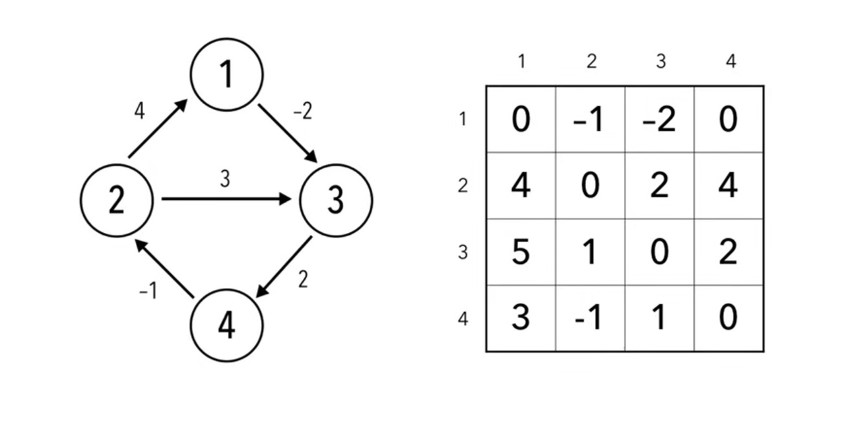

# Trees 🌳

A tree is a connected, acyclic graph.

- Edges are called branches.
- Nodes without children are leaf nodes.
- Each node has only one parent.
- There is a unique path between any two nodes.
- A tree with ‘n’ nodes has ‘n-1’ edges.
- More than ‘n-1’ edges form a cycle, making it a cyclic graph.
- Removing any edge disconnects the tree.
- DAGs do not have cycles but allow multiple parents for a node, violating the single-parent rule of trees.
- DAGs may have disconnected components, violating the connected nature required for trees.
- DAGs can also be considered trees if each node has only one parent and the DAG is connected.
- A node without any parent is called a root node (relevant for directed graphs only; for undirected graphs, any node can act as a starting point).


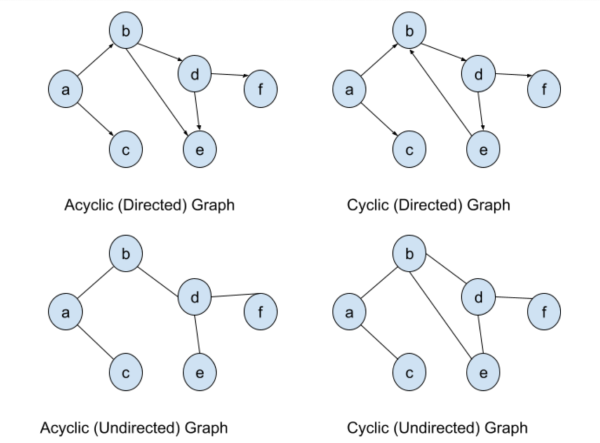

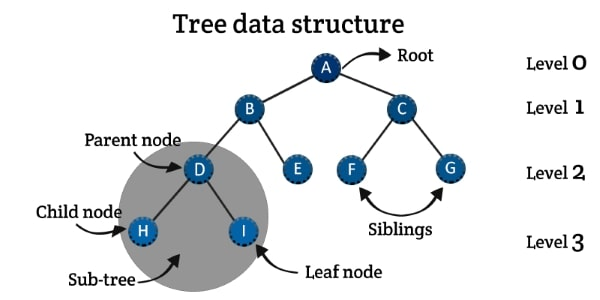

# Forest 🌳🌳🌳🌳🌳

A forest is a collection of disjoint trees, meaning it is a disconnected, acyclic graph.

- Disjoint means trees are disconnected; a node cannot belong to two trees simultaneously (as it would connect those trees).

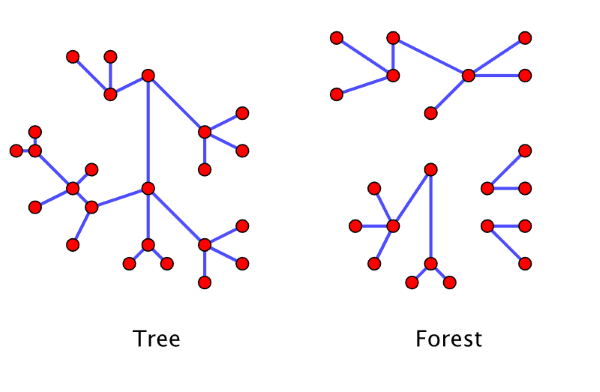

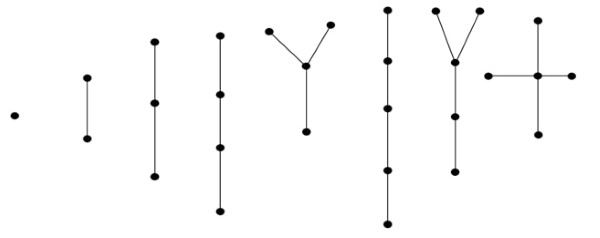

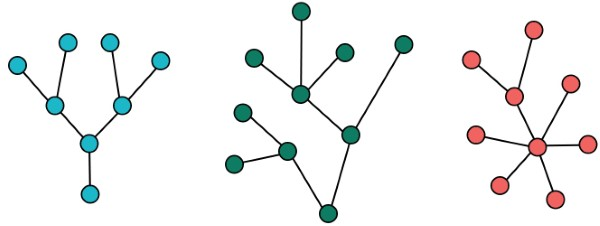

# Spanning Tree

A spanning tree of a graph is a subgraph that is a tree and includes all vertices of the original graph.

- H is a spanning tree of G if:
  - H is a tree.
  - H contains all vertices of G.

Spanning trees differ from general trees in that they include all vertices of the graph. While a graph can have multiple trees, not all trees include all graph vertices. Spanning trees are special in that they span the entire graph, including every vertex.

Spanning trees for a graph are not unique; there can be many spanning trees for the same graph.

**Minimum Cost Spanning Tree (MCST)**: Among the different spanning trees, the MCST is the one with the minimum total edge weight.

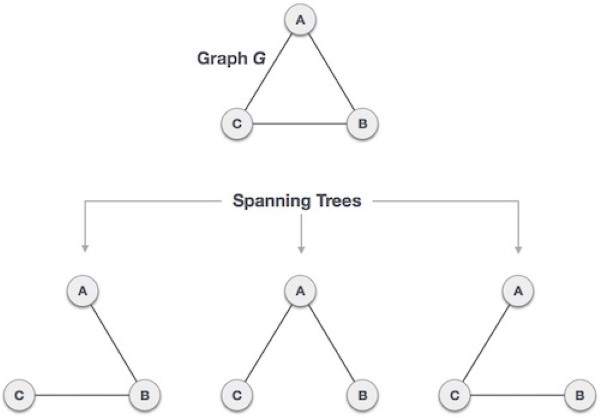

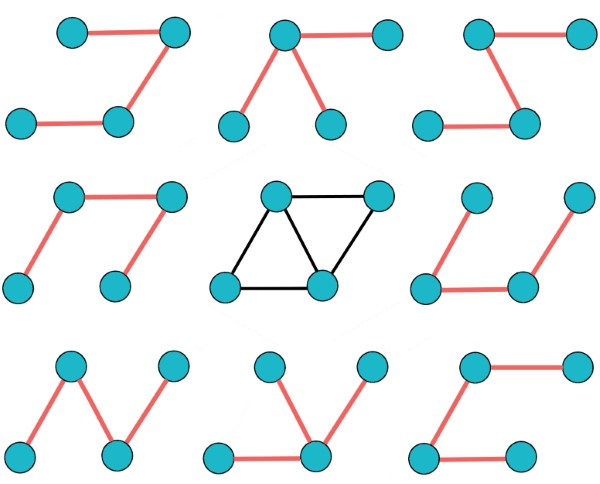

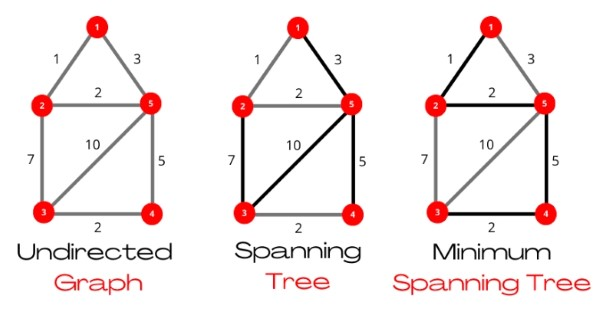

# Minimum Cost Spanning Tree (MCST)

> Among the different spanning trees, the MCST is the one with the minimum total edge weight.

**Find a minimum (cost) spanning tree (MST/MCST) for a weighted undirected graph.**

- Prim's Algorithm

  - This algorithm starts with a single vertex and grows the spanning tree by adding the cheapest edge from the tree to a vertex not yet in the tree.

- Kruskal's Algorithm

  - This algorithm sorts all edges in non-decreasing order of their weight and then picks the smallest edge that doesn't form a cycle until all vertices are connected.

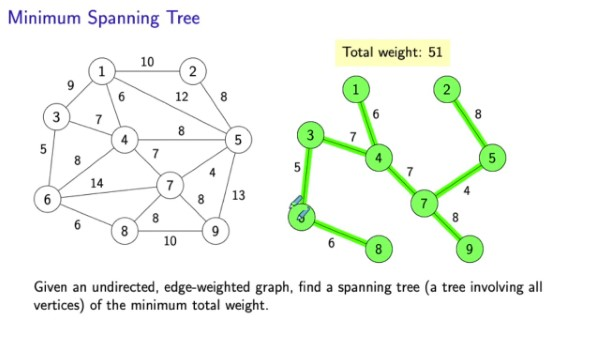

# Prim's Algorithm

> This algorithm starts with a single vertex and grows the spanning tree by adding the cheapest edge from the tree to a vertex not yet in the tree.

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Start with an empty MST.
   - Initialize a `PriorityQueue` `pq` and a `visited` set.
   - Start from an arbitrary node (e.g., `start_vertex`), add it to `visited`, and enqueue its edges.

2. **Processing**:
   - While `pq` is not empty:
     - Dequeue the edge with the smallest weight.
     - If the edge connects to an unvisited node, add this edge to the MST.
     - Add the node to `visited` and enqueue its edges (if the other node of the edge is not visited).

3. **Result**:
   - The MST contains all nodes and minimum weight edges that connect all nodes without forming any cycles.

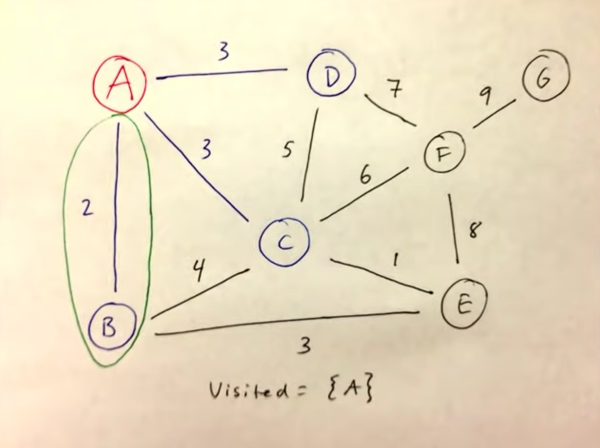

In [30]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)

In [31]:
def prim(adjacency_list, start_vertex):
  mst = []
  visited = {vertex: False for vertex in adjacency_list}
  visited[start_vertex] = True
  pq = PriorityQueue()

  # add all edges from start_vertex to the priority queue
  for neighbor, weight in adjacency_list[start_vertex]:
    pq.enqueue(weight, (start_vertex, neighbor))

  while not pq.is_empty():
    weight, (u, v) = pq.dequeue()

    if not visited[v]:
      visited[v] = True
      mst.append((u, v, weight))

      for next_neighbor, next_weight in adjacency_list[v]:
        if not visited[next_neighbor]:
          pq.enqueue(next_weight, (v, next_neighbor))

  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

prim(adjacency_list, 0)

[(0, 2, 6), (2, 1, 4), (2, 3, 11)]

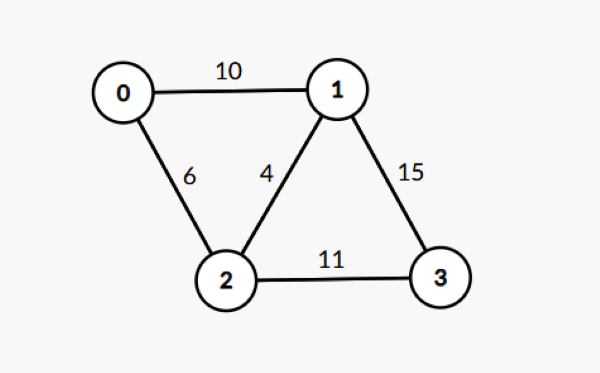